## Assignment for Week 2 - KNN

### Exercise:

**Data Set:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease <br>
Notice, this is the same dataset that you worked with last week.  Feel free to use your cleaned up data file or you can use the one that I have posted in WorldClass. 

**Objective:** Predict heart disease in patients.

* Get to know your data, start out by data exploration. Summarized your finding.

* Divide the data into training set and test set randomly with ratio 80:20.  Make prediction based on 1-nearest neighbor. What is the error rate of this approach?  Report your results in a confusion matrix.

* Use different values for K, what is the optimal value of K from your experiments? Report the error rate of the optimal K value and its confusion matrix. Is there any improvement (by how much) over 1-nearest neighbor?

* Is there anything else you can do to improve your model? If yes, demonstrate your approach. (Hint: there is always something that you can try, unless your accuracy score is 100%)


### Deliverables:

Upload your notebook's .ipynb file (Also, if you decide to use your heart_disease data set, I'll need a copy of that too. I can't validate your notebook without your dtatset.)
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

## I. Introduction
***

## II. Methods/Code, III. Results/Output, IV. Analysis of Results
***

### Setup

In [1]:
# pandas
import pandas as pd

# sklearn
from sklearn.neighbors import KNeighborsClassifier # We have a discrete codomain for our num target column
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# pipelines and preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# alternative classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# ensemble methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


# visualization of classifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

# standard plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# warning filter
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
!head assign_wk2/heart.disease.data.clean.csv

age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
63,1,1,145,233,50,20,1,1,2,150,0,6,0
67,1,4,160,286,40,40,0,1,2,108,1,3,2
67,1,4,120,229,20,35,0,1,2,129,1,7,1
37,1,3,130,250,0,0,0,1,0,187,0,3,0
41,0,2,130,204,0,0,0,1,2,172,0,3,0
56,1,2,120,236,20,20,0,1,0,178,0,3,0
62,0,4,140,268,0,0,0,1,2,160,0,3,3
57,0,4,120,354,0,0,0,1,0,163,1,3,0
63,1,4,130,254,0,0,0,0,2,147,0,7,2


In [3]:
# Load dataset into dataframe
# heart_df fields --> age, sex, cp, trestbps, chol, cigs, years, fbs, famhist, restecg, thalach, exlang, thal, num
heart_df = pd.read_csv('assign_wk2/heart.disease.data.clean.csv')
heart_df

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50.0,20.0,1,1,2,150,0,6,0
1,67,1,4,160,286,40.0,40.0,0,1,2,108,1,3,2
2,67,1,4,120,229,20.0,35.0,0,1,2,129,1,7,1
3,37,1,3,130,250,0.0,0.0,0,1,0,187,0,3,0
4,41,0,2,130,204,0.0,0.0,0,1,2,172,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,39,0,3,138,220,20.0,23.0,0,0,0,152,0,3,0
278,57,1,2,154,232,40.0,35.0,0,1,2,164,0,3,1
279,58,0,4,130,197,0.0,0.0,0,1,0,131,0,3,0
280,57,1,4,110,335,20.0,15.0,0,1,0,143,1,7,2


### Refamiliarize ourselves with the dataset

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   cigs      282 non-null    float64
 6   years     282 non-null    float64
 7   fbs       282 non-null    int64  
 8   famhist   282 non-null    int64  
 9   restecg   282 non-null    int64  
 10  thalach   282 non-null    int64  
 11  exang     282 non-null    int64  
 12  thal      282 non-null    int64  
 13  num       282 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 31.0 KB


In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.195035,247.705674,16.836011,15.347364,0.148936,0.620567,1.014184,149.826241,0.326241,4.677305,0.907801
std,9.053083,0.468338,0.955405,16.739821,46.178771,18.876755,15.276814,0.356658,0.486108,0.998118,22.737594,0.469670,1.936386,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.250000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,11.976385,15.000000,0.000000,1.000000,2.000000,153.500000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,75.000000,54.000000,1.000000,1.000000,2.000000,202.000000,1.000000,7.000000,4.000000


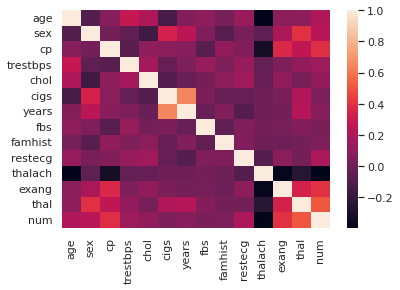

In [6]:
_ = sns.heatmap(heart_df.corr())

It looks like we have few correlations that hover around zero, so we can try removing columns down the road to improve performance. To start I will keep them in, and we can decide from there.

### Create our Train/Test/Split
***

Our target column 'num' is a categorical that scales the severity of heart disease. My understanding is that we are just trying to predict heart disease yes or no given the inputs. I will reduce the 'num' column to a boolean, and then create our test and train datasets.

In [7]:
# Binarizing our target value, we could also set each category as their own column and go that way,
# but I believe the spirit of the task is a Yes/No on if someone has heart disease, not what category of heart disease
def reduceNum(num): # convert our num column into a yes/no on heart disease
    if num > 0:
        return 1
    else:
        return 0

In [8]:
cols = heart_df.columns
target_col = 'num'
feat_cols = [c for c in cols if c != target_col]

X = heart_df[feat_cols].values
# y = heart_df[target_col].values
y = heart_df[target_col].apply(reduceNum).values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Setup KNN Classifier

We will start on raw data, without scaling, but understanding that this will likely lead to poor performance on our first attempt at prediction using the KNN.

In [10]:
# define and fit our model
model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [11]:
# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1
 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1]
Predictions for test data set
[1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1]


In [12]:
#compare the two sets for 'num'
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[-1  0  0  1  0  0 -1  1  1  1  0  1 -1  1  0  1 -1  0  0 -1 -1  1  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0  0  1 -1  1  0  1  1 -1  0  0  0  1
  0  0  1  0  0  1  0  0  0]


In [13]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test,preds))
print(accuracy_score(y_test,preds))

0.5769704433497538
0.5789473684210527


As we expected, before scaling, we have only slightly better than random chance at a correct classification. This means that our largest number columns do not account for the majority of the predictive power here. We will move on to normalization and standarization to see if we can do better.

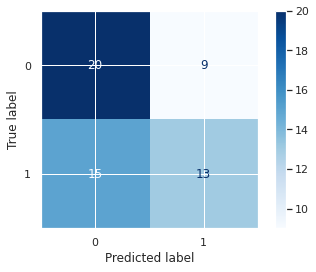

In [14]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

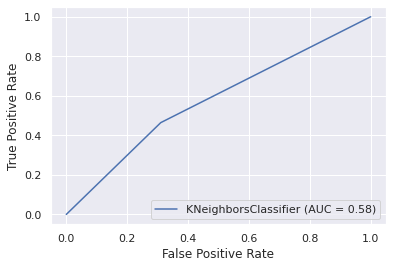

In [15]:
plot_roc_curve(model, X_test, y_test)

Not great...

### Normalizing the data

I am going to use pipelines for scaling the data, since I will eventually like to try comparing a couple different scaling functions, and I do not want to have to keep track of three different training and testing x datasets.

In [16]:
# we only want to normalize our feature columns in the dataset and I don't want to resplit the dataset.
# So, I will normalize the X_train and X_test only
from sklearn import preprocessing

s1 = MinMaxScaler()
s2 = StandardScaler() # We will use this for normalized vs. standardized later

In [17]:
# define and fit our model
model = Pipeline([('Scaler', s1),('KNN', KNeighborsClassifier(n_neighbors=1))])
model.fit(X_train, y_train)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=1))])

In [18]:
# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1
 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1]
Predictions for test data set
[1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1]


In [19]:
#compare the two sets for 'subscribed'
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[-1  0  0  1  1  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0
 -1  0  1  1  0  0  0  0  0]


In [20]:
print(roc_auc_score(y_test,preds))
print(accuracy_score(y_test,preds))

0.8066502463054187
0.8070175438596491


This is a considerable improvement for only using 1 neighbor. Our next step will be to search our k-values and see if we can find a more optimal value than 1 neighbor.

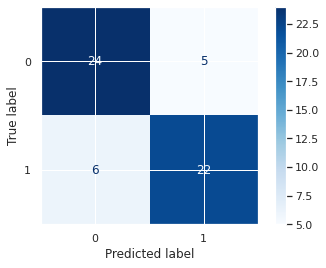

In [21]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

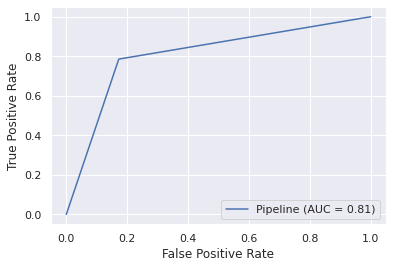

In [22]:
plot_roc_curve(model, X_test, y_test)

### Finding the optimal K value

I am arbitrarily creating a search space for our k neighbors from 1 to 29. I don't have a specific reason on the size other than the resulting values should give us a trend if we need to extend the search space.

In [23]:
# Adapted from https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152309/View
# Using roc/acc to determine the optimal number of neighbors for the final model. 

# determine the optimal number of neighbors 
sum_roc = []
sum_acc = []
models = []

# fit the model for a range of 1 to 30 neighbors and add to array
for n in range (1,30):
    print('Calculating for ',n,' neighbors')
    
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = Pipeline([('Scaler', s1),('KNN', KNeighborsClassifier(n_neighbors=n))])
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    sum_roc.append(roc_auc_score(y_test, preds))
    sum_acc.append(accuracy_score(y_test,preds))
    models.append(model)

Calculating for  1  neighbors
Calculating for  2  neighbors
Calculating for  3  neighbors
Calculating for  4  neighbors
Calculating for  5  neighbors
Calculating for  6  neighbors
Calculating for  7  neighbors
Calculating for  8  neighbors
Calculating for  9  neighbors
Calculating for  10  neighbors
Calculating for  11  neighbors
Calculating for  12  neighbors
Calculating for  13  neighbors
Calculating for  14  neighbors
Calculating for  15  neighbors
Calculating for  16  neighbors
Calculating for  17  neighbors
Calculating for  18  neighbors
Calculating for  19  neighbors
Calculating for  20  neighbors
Calculating for  21  neighbors
Calculating for  22  neighbors
Calculating for  23  neighbors
Calculating for  24  neighbors
Calculating for  25  neighbors
Calculating for  26  neighbors
Calculating for  27  neighbors
Calculating for  28  neighbors
Calculating for  29  neighbors


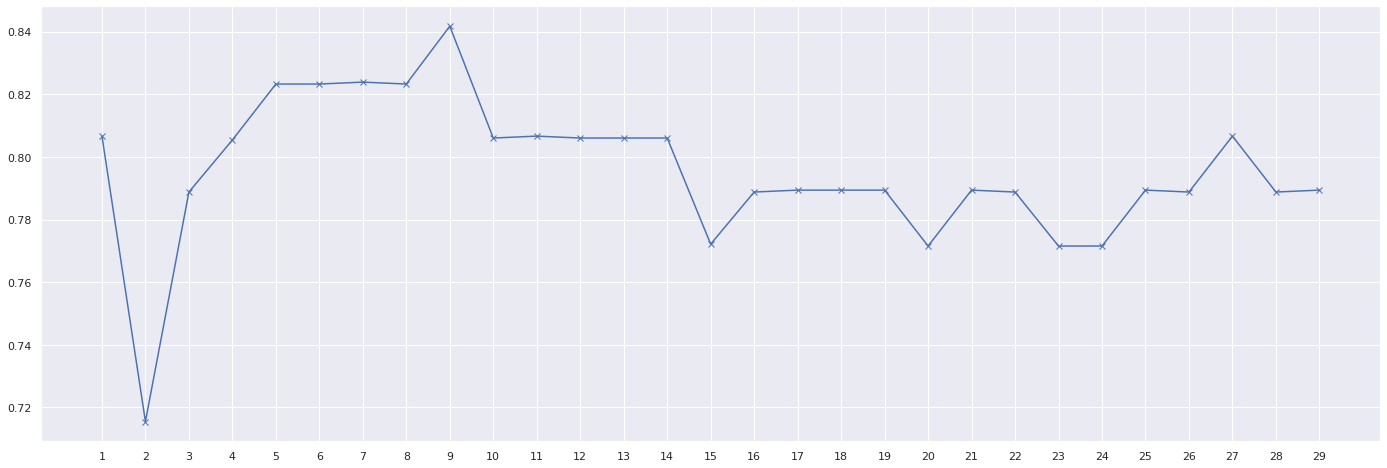

In [24]:
# Adapted from https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152309/View
# make our scree plot to visually see the optimal number of neighbors

plt.figure(figsize=(24,8))
plt.xticks(range(1, 30))
plt.plot(range(1, 30), sum_roc, 'bx-')

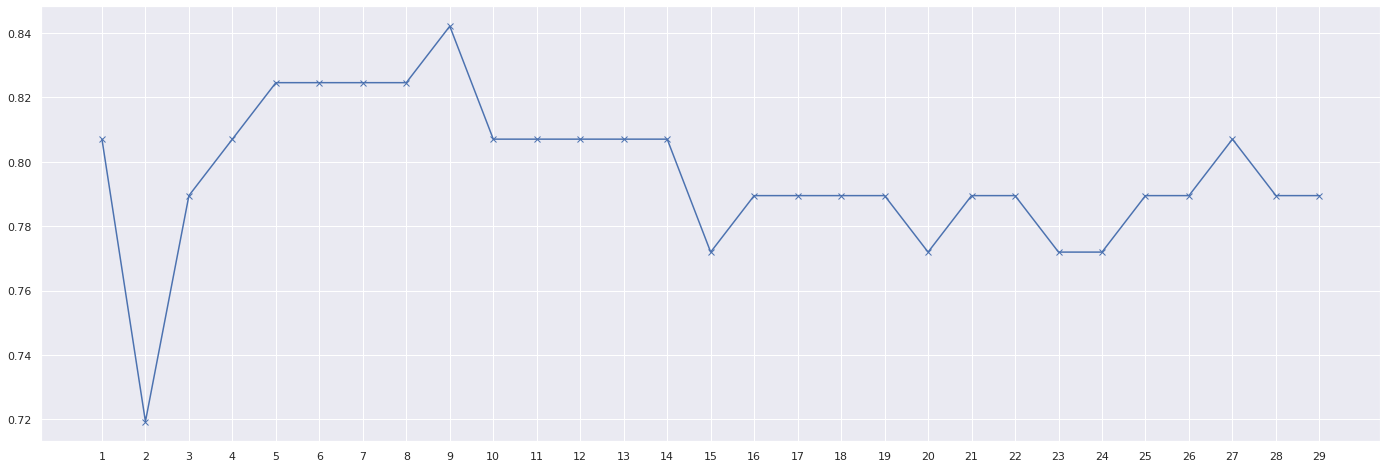

In [25]:
# Adapted from https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152309/View
# make our scree plot to visually see the optimal number of neighbors

plt.figure(figsize=(24,8))
plt.xticks(range(1, 30))
plt.plot(range(1, 30), sum_acc, 'bx-')

**What is our optimal k value for our KNN model?**

In [26]:
# our maximum roc score was at the following k value

max_k = sum_roc.index(max(sum_roc)) + 1
max_k

9

It looks like we have a maximum k, and that the performance trails off from there, so I think we can be satisfied with the maximum from our search space and move on.

In [27]:
# our maximum roc score

max(sum_roc)

0.8417487684729064

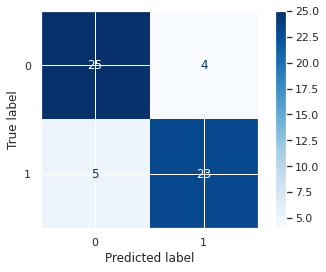

In [28]:
model = Pipeline([('Scaler', s1),('KNN', KNeighborsClassifier(n_neighbors=max_k))])
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

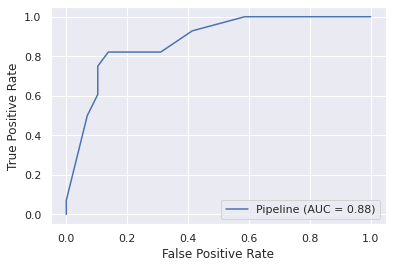

In [29]:
plot_roc_curve(model, X_test, y_test)

From here it looks like we have a fairly powerful predictor, with our best performance on the test data being an roc score of .842. I believe that there are two straightforward ways of improving the real world performance here, and they are by using crossvalidation to fight overfitting, and to extend our model selection to include other classifiers.

###  Cross-validation and Other Classifiers

In [30]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [31]:
num_folds = 5
seed = 42
scoring = 'accuracy'

In [32]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f'{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})'
    print(msg)

LR: 0.8311 (0.0802)
LDA: 0.8222 (0.0783)
KNN: 0.6578 (0.0711)
CART: 0.7289 (0.0603)
NB: 0.8178 (0.0603)
SVM: 0.5689 (0.0777)


We expect these numbers to be lower than our maximized KNN, first because we have not done scaling preprocess steps on the data so it is still in its unscaled raw form, and because we are using cross validation which is giving us multiple runs that we are taking a mean of rather than just the top roc score.

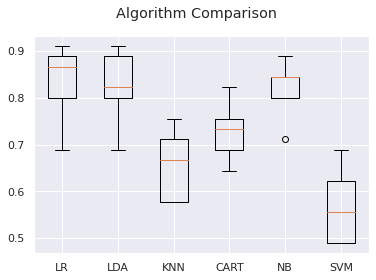

In [33]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

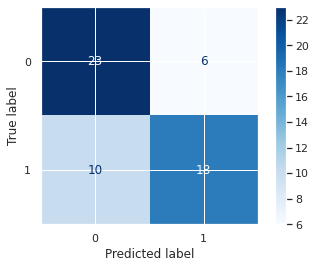

In [34]:
# Best of models suite (Logisitic Regression) on raw data

model = models[0][1]
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

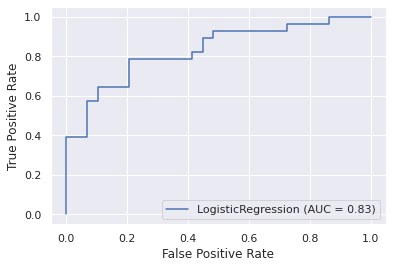

In [35]:
plot_roc_curve(model, X_test, y_test)

### Applying Scaler Pipelines to Models

Now we can give our various models a fair shake at comparative performance. We will preprocess data for all models, use our max_k we determined earlier, and scale using min-max and standard.

In [36]:
pipelines = []
pipelines.append(('MM_LR', Pipeline([('Scaler', s1),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('SS_LR', Pipeline([('Scaler', s2),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('MM_LDA', Pipeline([('Scaler', s1),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('SS_LDA', Pipeline([('Scaler', s2),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('MM_KNN', Pipeline([('Scaler', s1),('KNN', KNeighborsClassifier(n_neighbors=max_k))])))
pipelines.append(('SS_KNN', Pipeline([('Scaler', s2),('KNN', KNeighborsClassifier(n_neighbors=max_k))])))
pipelines.append(('MM_CART', Pipeline([('Scaler',s1),('CART', DecisionTreeClassifier())])))
pipelines.append(('SS_CART', Pipeline([('Scaler',s2),('CART', DecisionTreeClassifier())])))
pipelines.append(('MM_NB', Pipeline([('Scaler', s1),('NB', GaussianNB())])))
pipelines.append(('SS_NB', Pipeline([('Scaler', s2),('NB', GaussianNB())])))
pipelines.append(('MM_SVM', Pipeline([('Scaler', s1),('SVM', SVC(gamma='auto'))])))
pipelines.append(('SS_SVM', Pipeline([('Scaler', s2),('SVM', SVC(gamma='auto'))])))

In [37]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f'{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})'
    print(msg)

MM_LR: 0.8089 (0.0622)
SS_LR: 0.8222 (0.0783)
MM_LDA: 0.8222 (0.0783)
SS_LDA: 0.8222 (0.0783)
MM_KNN: 0.8178 (0.0453)
SS_KNN: 0.8178 (0.0382)
MM_CART: 0.7156 (0.0736)
SS_CART: 0.7111 (0.0613)
MM_NB: 0.8178 (0.0603)
SS_NB: 0.8178 (0.0603)
MM_SVM: 0.8089 (0.0518)
SS_SVM: 0.8311 (0.0573)


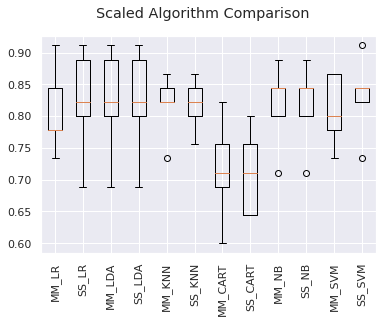

In [38]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

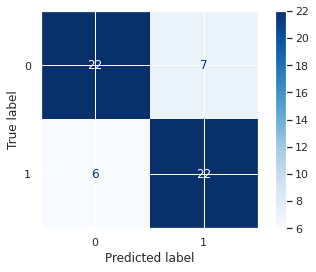

In [39]:
# Top performer is the standardized SVM with cross validation
model = pipelines[11][1]
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

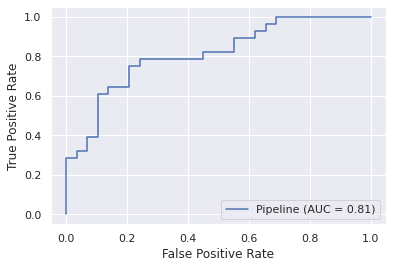

In [40]:
plot_roc_curve(model, X_test, y_test)

### Ensemble Methods

We can throw in one more wrench before we start trying to increase cross validation runs or other options for further improving performance. Lets try some ensemble methods and see how they compare to our best performing models so far.

In [41]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))

In [42]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f'{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})'
    print(msg)

AB: 0.8000 (0.0507)
GBM: 0.8178 (0.0800)
RF: 0.7778 (0.0466)
ET: 0.7422 (0.0435)


Our standardized SVM classifier with crossvalidation is still our best performer, but our gradient bossing ensemble did well. I am sure that we could play around with the parameters, or perform different grid searches to improve our ensemble performance as well.

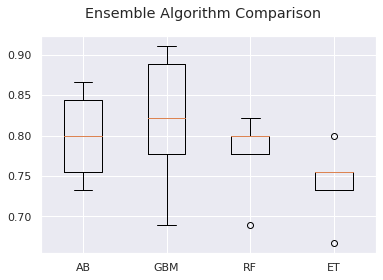

In [43]:
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

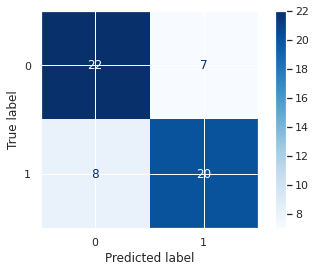

In [44]:
model = ensembles[1][1]
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

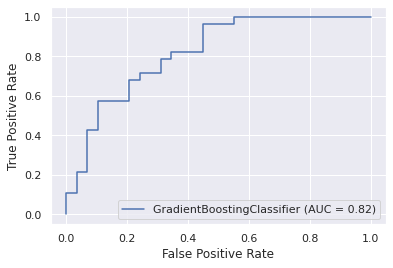

In [45]:
plot_roc_curve(model, X_test, y_test)

## V. Conclusion
***

From the above analysis we can conclude that our KNN classifier has an optimal K-value of 9, before K-fold cross validation we had an accuracy that was likely to be slightly overfit and calculated at just under 0.8417. When cross-validation was introduced to the process our accuracy drops to a roc score of 0.8178.

When looking at other supervised learning models we compared our KNN classifier to Logisitic Regression, Linear Discriminant Analysis, Decision Tree Classifier, Gaussian Niave Bayes, and Support Vector Classifier. The models were treated the same way as the KNN model and our best model after treatment was the Support Vector Machine classifier with standar scaling for a mean roc score of 0.8311. Additionally, we tested four ensemble methods AdaBoost, Gradient Boosting Classifier, Random Forest Classifier, and the Extra Trees Classifier with the best model roc score of 0.8178 coming from the Gradient Boosting Classifier.

This solution could be further refined by creating a realistic cost function for the quadrants of our confusion matrix. This would weight our false postives, false negatives and true values. The weighted cost function could give us a better solution for practical performance. We could also grid search other parameters on our individual alternative models.